In [2]:
import tensorflow as tf

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((110,110,3)),
    tf.keras.layers.Conv2D(32, 2, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, 2, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, 2, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, 2, padding="valid", activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation="softmax")    
])

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 110, 110, 32)      416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 54, 54, 32)        4128      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 32)        4128      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 32)       

In [ ]:
print("Hallo")

In [12]:
model = tf.keras.Sequential()

In [15]:
model.add(tf.keras.layers.InputLayer((110,110,3)))
model.add(tf.keras.layers.Dense(12))

In [16]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         multiple                  0         
_________________________________________________________________
dense_5 (Dense)              (None, 110, 110, 12)      48        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [1]:
from src.scrapper.WebScrapper import Scrapper

In [3]:
test_scrapper = Scrapper()
test_scrapper.test_run(page_range=[1,2])

['uz1111', '3', 'XL', 'Replay', 'Gepusht']
1
['illz', '15', 'XL', 'Vintage', 'Gepusht']
1
['martymcfly14700', '3', 'XS', 'Kith', 'Gepusht']
1
['uncle_dan', '18', 'M', 'Vintage', 'Gepusht']
1
['nloew', '21', 'M', '6pm', 'Gepusht']
1
['nloew', '4', 'L', 'Vintage', 'Gepusht']
1
['gianluca6', '7', 'M', 'Neighborhood', 'Gepusht']
1
['paul37249', '2', 'L', 'peso', 'Gepusht']
1
['resell77', '11', 'L', 'peso', 'Gepusht']
1
['luna0608', '0', 'L', 'Mustang', 'Gepusht']
1
['katju99', '11', 'L', 'Pull & Bear', 'Gepusht']
1
['jonas_089', '20', 'L', 'Esprit', 'Gepusht']
1
['play4wy', '4', 'XL', 'Hanes', 'Gepusht']
1
['tinwiekris', '1', 'XL', 'FSBN', 'Gepusht']
1
['felix_l_b', '7', 'XL', 'Travis Scott', 'Gepusht']
1
['julianfriedle', '16', 'L', 'peso', 'Gepusht']
1
['iamlizacole', '24', 'XL', 'Hard Rock Café', 'Gepusht']
1
['lisl1706', '9', 'XL', 'Wood Wood', 'Gepusht']
1
['robinunger1212', '0', 'M', 'Roberto geissini', 'Gepusht']
1
['damian.s98', '10', 'S', 'peso', 'Gepusht']
1
['premiummenswear', '

In [9]:
from src.scrapper.IdMaps import Mapper

def create_conf(args) -> str:
    """ Given the different preferences the function maps those inputs into 
    their respective string notation and appends them to the url
    
    args = [
        {"gender": "femal", "category": shoes", "size": [36, 37], "color": ["red", "green"], "brand": ["nike", "addidas"]},
        {"gender": "male", "category": shoes", "size": [36, 37], "color": ["red", "green"], "brand": ["nike", "addidas"]},
        {"gender": "male", "category": pants", "size": ["M", "L"]}
        {"gender": "male", "category": rings", "size": ["M", "L"]}
    ]
    """

    # class will contain value
    url = "example_url.html"
    url = url + "&"

    arg_dict = {
        "sizes": [],
        "colors": [],
        "brands": [],
        "categories": [],
    }

    for arg in args:
        temp_conf = Mapper[arg["gender"]]

        # check for category
        assert isinstance(arg["category"], str), """Only accepts single category types, to 
            include multiple category just append them to the args"""

        # Handling of cases in which args are empty
        conf_categories = temp_conf["category"]
        # print(conf)
        if "category" in arg.keys():
            category = conf_categories[arg["category"]]
            arg_dict["categories"].append(category)        
        else:
            # take the category for all
            category = conf_categories["all"]
            arg_dict["categories"].append(category)


        if "size" in arg.keys():
            # print(arg["category"])
            size_conf = temp_conf["sizes"][arg["category"]]
            print(size_conf)
            for size in arg["size"]:
                # check if value is a valid key for the dict
                if size not in size_conf: 
                    raise ValueError(f"Argument {size} is not supported. Either change the sizes or contac the creators via github")

                # add the respective url tokens based on the 
                # given catergory
                print(float(size))
                arg_dict["sizes"].append(size_conf[float(size)])
        

        if "color" in arg.keys():
            color_conf = Mapper["colors"]
            for color in arg["color"]:
                # add the respective url tokens based on the 
                # given catergory
                if color not in color_conf: 
                    raise ValueError(f"Argument {color} is not supported. Either change the sizes or contac the creators via github")
                    

                color_token = color_conf[color]
                arg_dict["colors"].append(color_token)

        if "brand" in arg.keys():
            brand_conf = Mapper["brands"]
            for brand in arg["brand"]:
                # add the respective url tokens based on the 
                # given catergory
                if brand not in brand_conf: 
                    raise ValueError(f"Argument {brand} is not supported. Either change the sizes or contac the creators via github")
                    
                brand_token = brand_conf[brand]
                arg_dict["brands"].append(brand_token)

    for key in arg_dict.keys():
        for token in set(arg_dict[key]):
            url += str(token) + "&"

    return url, arg_dict


    

In [10]:
args = [
    {"gender": "female", "category": "shoes", "size": [36, 37], "color": ["red", "green"], "brand": ["nike", "addidas"]},
    {"gender": "male", "category": "shoes", "size": [38, 39], "color": ["red", "green"], "brand": ["nike", "addidas"]},
    # {"gender": "male", "category": "pants", "size": ["M", "L"]},
    # {"gender": "male", "category": "rings", "size": ["M", "L"]}
]

create_conf(args)

{35.0: 'size_id[]=55', 35.5: 'size_id[]=1195', 36.0: 'size_id[]=56', 36.5: 'size_id[]=1196', 37.0: 'size_id[]=57', 37.5: 'size_id[]=1197', 38.0: 'size_id[]=58', 38.5: 'size_id[]=1198', 39.0: 'size_id[]=59', 39.5: 'size_id[]=1199', 40.0: 'size_id[]=60', 40.5: 'size_id[]=1200', 41.0: 'size_id[]=61', 41.5: 'size_id[]=1201', 42.0: 'size_id[]=62', 43.0: 'size_id[]=63'}
36.0
37.0
{38.0: 'size_id[]=776', 39.0: 'size_id[]=778', 40.0: 'size_id[]=780', 41.0: 'size_id[]=782', 42.0: 'size_id[]=784', 42.5: 'size_id[]=785', 43.0: 'size_id[]=787', 43.5: 'size_id[]=788', 44.0: 'size_id[]=790', 44.5: 'size_id[]=791', 45.0: 'size_id[]=792', 46.0: 'size_id[]=793', 47.0: 'size_id[]=794'}
38.0
39.0


('example_url.html&size_id[]=57&size_id[]=776&size_id[]=56&size_id[]=778&None&color_id[]=187&None&None&test&',
 {'sizes': ['size_id[]=56', 'size_id[]=57', 'size_id[]=776', 'size_id[]=778'],
  'colors': ['color_id[]=187', None, 'color_id[]=187', None],
  'brands': [None, None, None, None],
  'categories': [None, 'test']})

In [6]:
print(Mapper["female"]["sizes"]["shoes"][float(int(36))])

size_id[]=56


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#data = pd.read_csv("data/full_data.csv")

In [2]:
data = pd.read_csv("data/full_data.csv", names=["user", "likes", "size", "brand", "price", "art-link", "user-link"])
data.head()

,user,likes,size,brand,price,art-link,user-link
0,uz1111,3,XL,Replay,"8,00 €",https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/65706702-uz1111
1,illz,15,XL,Vintage,"35,00 €",https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/43707297-illz
2,martymcfly14700,3,XS,Kith,"79,00 €",https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/43844982-martymcf...
3,uncle_dan,18,M,Vintage,"35,00 €",https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/65661162-uncledan
4,nloew,21,M,6pm,"60,00 €",https://www.vinted.de/herren/kleidung/tops-and...,https://www.vinted.de/member/43787172-nloew


/home/melih/Documents/Uni/s4/SciPy/scipy_final
<selenium.webdriver.remote.webelement.WebElement (session="468e5572aed288b1dd5a99a3df2ea721", element="4d21f04b-0a1a-4993-a13e-e3be46c80bd3")>
<selenium.webdriver.remote.webelement.WebElement (session="468e5572aed288b1dd5a99a3df2ea721", element="574d80ee-720a-4949-b6d2-4b17f74fb199")>
<selenium.webdriver.remote.webelement.WebElement (session="468e5572aed288b1dd5a99a3df2ea721", element="7d278422-3122-402c-afbd-fb5eb02eb5f0")>
<selenium.webdriver.remote.webelement.WebElement (session="468e5572aed288b1dd5a99a3df2ea721", element="b8c32896-5725-42eb-b646-ae5575b228a9")>


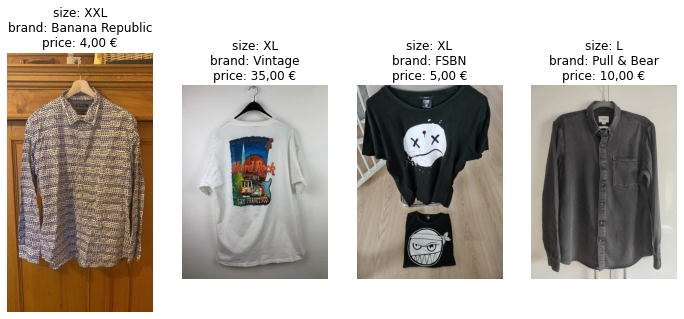

In [3]:
from src.scrapper.WebScrapper import Scrapper

def show_samples(path="data/full_data.csv"):
    # read the data
    data = pd.read_csv(path, names=["user", "likes", "size", "brand", "price", "art-link", "user-link"])
    scrapper = Scrapper(silent=True)
    
    # create 4 random indices to plot from
    random_vals = []
    
    plt.figure(figsize=(12,10))
    for n in range(4):

        # Within the dataset there can be some articles for
        # which the page is deleted since they are sold so
        # we will search for entries which still work
        
        finished = True
        while finished:
            rand_index = np.random.randint(0, len(data))
            
            row_dict = data.iloc[rand_index]
            # using sample will only yield the first image instead of all 
            # images on the article page
            image = scrapper.article_images(row_dict["art-link"], sample=True)
            
            if image and rand_index not in random_vals:
                finished = False

        
        plt.subplot(1,4,n+1)
        plt.imshow(image[0])
        plt.axis("off")
        plt.title(f"size: {row_dict['size']}\nbrand: {row_dict['brand']}\nprice: {row_dict['price']}")

        random_vals.append(rand_index)

        
show_samples()




In [62]:
data.iloc[1]["art-link"]

'https://www.vinted.de/herren/kleidung/tops-and-t-shirts/t-shirts/bedruckte-t-shirts/1234286974-vintage-hard-rock-cafe-t-shirt-size-xl-san-francisco'

In [28]:
from selenium import webdriver
import os

options = webdriver.ChromeOptions()
# options.add_argument("no-sandbox")
options.add_argument("headless")
#options.add_argument("window-size=1400,2100")
options.add_argument('disable-blink-features=AutomationControlled')
options.add_argument('user-agent=fake_user')


curr_path = os.getcwd()
driver = webdriver.Chrome(curr_path + "/drivers/chromedriver_linux64/chromedriver", chrome_options=options)

<ipython-input-28-1e00d0331f3b>:13: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(curr_path + "/drivers/chromedriver_linux64/chromedriver", chrome_options=options)


In [29]:
driver.get("https://www.vinted.de/herren/kleidung/tops-and-t-shirts/hemden/gestreifte-hemden/1239319445-uspa-herren-hemd")

In [30]:
aaaa = driver.find_elements_by_tag_name("a")
links = driver.find_elements_by_class_name("item-photos")
print(links)

for a in aaaa:
    print(a.get_attribute("href"))

[<selenium.webdriver.remote.webelement.WebElement (session="e78fd55a6abf43b6e81988eac0d311ba", element="1e0d87ba-f52f-4648-acbf-3fc247c0e307")>]
https://www.vinted.de/
https://www.vinted.de/member/signup/select_type?ref_url=%2Fherren%2Fkleidung%2Ftops-and-t-shirts%2Fhemden%2Fgestreifte-hemden%2F1239319445-uspa-herren-hemd
https://www.vinted.de/member/signup/start?ref_url=%2Fitems%2Fnew
https://www.vinted.de/help/360?access_channel=vinted_guide
https://www.vinted.de/member/signup/start?ref_url=%2Fitems%2Fnew
https://www.vinted.de/member/signup/select_type
https://www.vinted.de/help/360?access_channel=vinted_guide
https://www.vinted.de/damen
https://www.vinted.de/herren
https://www.vinted.de/kinder
https://www.vinted.de/home
https://www.vinted.de/how_it_works
https://www.vinted.de/app
https://www.vinted.de/help
https://www.vinted.de/infoboard
https://www.vinted.de/about
https://www.vinted.com/jobs
https://www.vinted.de/presse
https://www.vinted.de/advertising
https://www.vinted.de/safety

In [19]:
driver.page_source
driver.current_url

'https://www.vinted.de/herren/kleidung/tops-and-t-shirts/hemden/gestreifte-hemden/1239319445-uspa-herren-hemd'